# Introduction
By Andrew M. Silva

The purpose of this notebook is to use the Breast Cancer dataset to build a machine learning classifier model capable to classify a breast cancer as malignant or benig using its features. 

## Importing libraries

In [0]:
# Available datasets
from sklearn import datasets
# Classifier model
from sklearn.ensemble import RandomForestClassifier
# Train and test data splitter
from sklearn.model_selection import train_test_split
# Methods to evaluate the model
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Methods to manipulate data
import numpy as np
import pandas as pd
# Methods to show the model as figure
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Loading dataset

In [5]:
# Loading iris dataset and transforming it on a Data Frame
cancer = datasets.load_breast_cancer()
data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])
cancer_df = pd.DataFrame(data, columns=columns)
# Printing the first 5 rows
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# Building and evaluating model

In [44]:
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
targets = ['target']

X = cancer_df[features]
y = cancer_df[targets]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=10)

model_options = {'n_estimators': 44, 'random_state': 10, 'min_samples_split': 4}
model = RandomForestClassifier(**model_options)
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

acc = accuracy_score(y_test, y_predicted)
print('Accuracy:', acc, 'that is, %.2f'%(acc*100),'%')

dmetric = classification_report(y_test, y_predicted)
print('Evaluation report\n', dmetric)

Accuracy: 0.9824561403508771 that is, 98.25 %
Evaluation report
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        59
         1.0       1.00      0.97      0.99       112

    accuracy                           0.98       171
   macro avg       0.98      0.99      0.98       171
weighted avg       0.98      0.98      0.98       171



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


# Seeing the model as figure

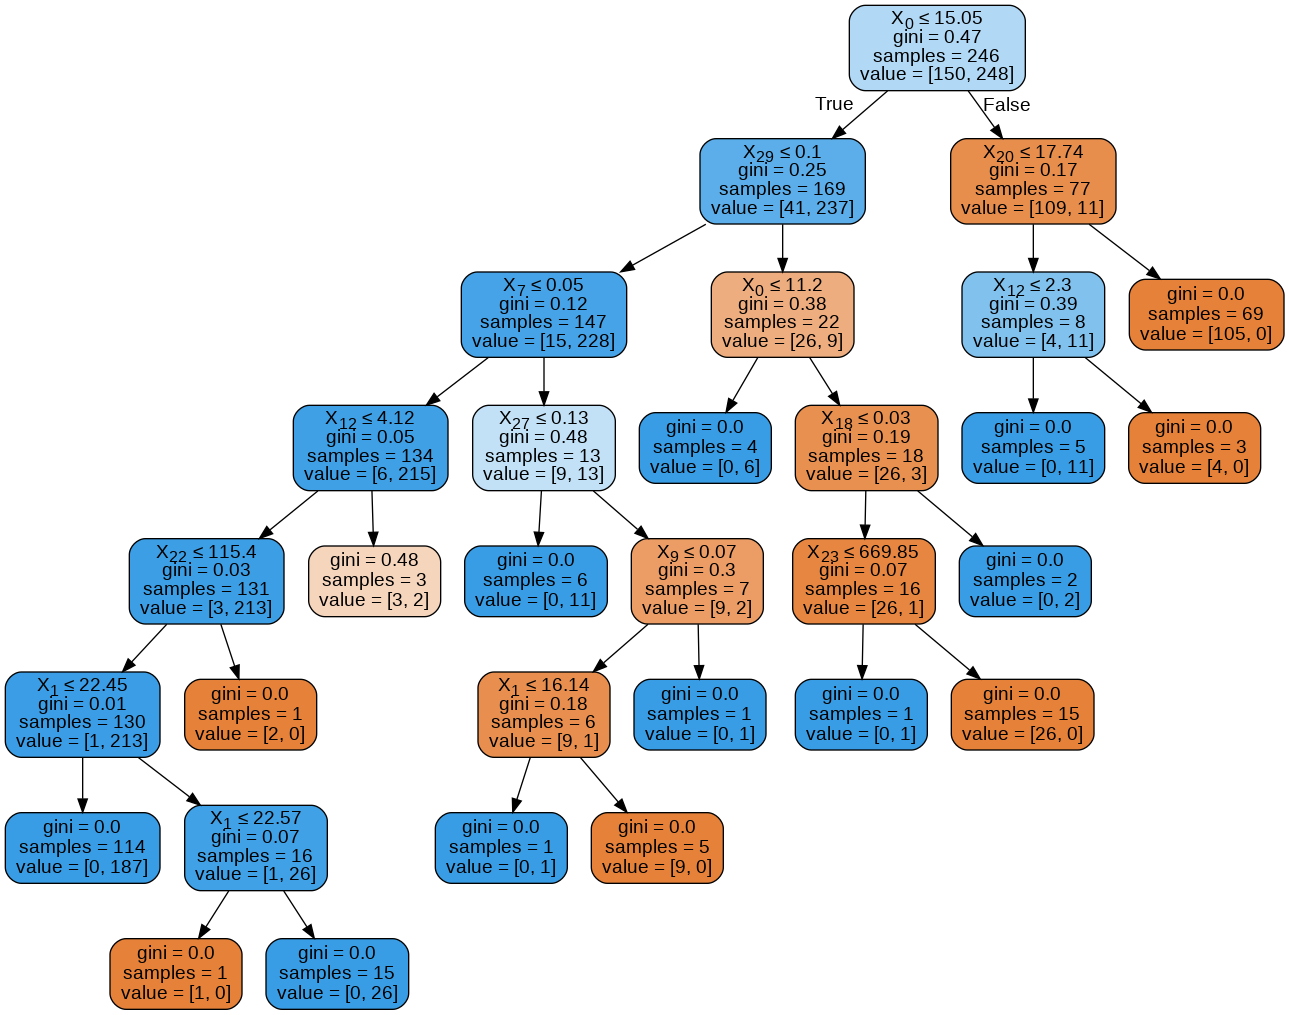

In [41]:
# Extract single tree
estimator = model.estimators_[0]

# Export as dot file
dot_data = StringIO()
export_graphviz(estimator,
                out_file=dot_data,
                rounded=True, 
                proportion=False, 
                precision=2, 
                filled=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())